In [13]:
import pandas as pd
import os
from pathlib import Path
import pandas as pd
from scipy import stats

# --- Automatically find the project root ---
# This walks up until it finds your project folder name
project_root = Path().resolve()
if project_root.name != "Positive_EV_Project":
    # go up directories until we find it
    for parent in Path().resolve().parents:
        if parent.name == "Positive_EV_Project":
            project_root = parent
            os.chdir(project_root)
            break

print(f"✅ Working directory set to: {Path().resolve()}")

# --- Now load the CSV relative to the repo root ---
odds_path = Path("data/interim/final_dataset.csv")
final_df = pd.read_csv(odds_path)

print(f"Loaded {final_df.shape[0]} rows and {final_df.shape[1]} columns")
final_df.head()


✅ Working directory set to: C:\Users\mattr\OneDrive\Desktop\Positive_EV_Project
Loaded 9997 rows and 17 columns


,bet_outcome_numeric,bet_outcome_text,close_odds,close_time,dg_id,open_odds,open_time,outcome,player_name,event_id,event_name,start_date,tour,book,market,close_time_dt,year
0,0,loss,550,2025-01-02 11:38,19895,500,2024-12-30 14:35,T30,"Schauffele, Xander",16,The Sentry,2025-01-02,pga,draftkings,win,2025-01-02 11:38:00,2025
1,0,loss,900,2025-01-02 11:38,14139,1100,2024-12-30 14:35,T26,"Thomas, Justin",16,The Sentry,2025-01-02,pga,draftkings,win,2025-01-02 11:38:00,2025
2,0,loss,1100,2025-01-02 11:38,22085,1000,2024-12-30 14:35,2,"Morikawa, Collin",16,The Sentry,2025-01-02,pga,draftkings,win,2025-01-02 11:38:00,2025
3,0,loss,1600,2025-01-02 11:38,23950,1800,2024-12-30 14:35,T5,"Aberg, Ludvig",16,The Sentry,2025-01-02,pga,draftkings,win,2025-01-02 11:38:00,2025
4,0,loss,1600,2025-01-02 11:38,15466,1800,2024-12-30 14:35,T15,"Cantlay, Patrick",16,The Sentry,2025-01-02,pga,draftkings,win,2025-01-02 11:38:00,2025


In [4]:
# Just find the damn file
from pathlib import Path

print("Current directory:", Path.cwd())

# Search EVERYWHERE
project_root = Path.cwd().parent.parent  # Go up 2 levels to be safe

found = list(project_root.rglob('final_dataset.csv'))

print(f"\nFound {len(found)} file(s) named 'final_dataset.csv':")
for f in found:
    print(f"  → {f}")
    
if found:
    print(f"\n✓ Use this path:")
    print(f"data_path = Path(r'{found[0]}')")

Current directory: C:\Users\mattr\OneDrive\Desktop\Positive_EV_Project

Found 1 file(s) named 'final_dataset.csv':
  → C:\Users\mattr\OneDrive\Desktop\Positive_EV_Project\data\interim\final_dataset.csv

✓ Use this path:
data_path = Path(r'C:\Users\mattr\OneDrive\Desktop\Positive_EV_Project\data\interim\final_dataset.csv')


In [5]:
"""
=============================================================================
Sprint 2 - Exploratory Data Analysis (EDA)
PGA Outrights Betting Project (2024-2025)
=============================================================================

PURPOSE:
    Explore cleaned data to understand patterns, relationships, and limitations.
    Generate visualizations for Sprint 2 report.

INPUTS:
    - data/interim/final_dataset.csv

OUTPUTS:
    - Visualizations saved to figures/
    - Statistical insights for report

SECTIONS:
    1. Univariate Analysis (distributions, summary stats)
    2. Bivariate/Multivariate Analysis (relationships, correlations)
    3. Surprising Findings
    4. Data Limitations
    
AUTHOR: [Your Name]
DATE: October 2024
=============================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION
# ============================================================================

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Create figures directory
figures_dir = Path('figures')
figures_dir.mkdir(parents=True, exist_ok=True)

print("✓ Imports and configuration complete")

# ============================================================================
# LOAD CLEANED DATA
# ============================================================================

data_path = Path(r'C:\Users\mattr\OneDrive\Desktop\Positive_EV_Project\data\interim\final_dataset.csv')

print(f"Loading data from: {data_path}")

df = pd.read_csv(data_path)

print("="*70)
print("DATA LOADED SUCCESSFULLY")
print("="*70)
print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Parse datetime if needed
if 'close_time_dt' in df.columns and df['close_time_dt'].dtype == 'object':
    print("\nParsing timestamp column...")
    df['close_time_dt'] = pd.to_datetime(df['close_time_dt'], errors='coerce')
elif 'close_time' in df.columns:
    print("\nParsing close_time column...")
    df['close_time_dt'] = pd.to_datetime(df['close_time'], errors='coerce')

# Display basic info
if 'close_time_dt' in df.columns:
    print(f"\nDate range: {df['close_time_dt'].min()} to {df['close_time_dt'].max()}")

if 'event_id' in df.columns:
    print(f"Events: {df['event_id'].nunique():,}")

if 'dg_id' in df.columns:
    print(f"Players: {df['dg_id'].nunique():,}")

if 'book' in df.columns:
    print(f"Books: {df['book'].unique()}")

print(f"\nColumns in dataset ({len(df.columns)}):")
print(df.columns.tolist())

print(f"\n✓ Data loaded: {len(df):,} observations ready for analysis")

✓ Imports and configuration complete
Loading data from: C:\Users\mattr\OneDrive\Desktop\Positive_EV_Project\data\interim\final_dataset.csv
DATA LOADED SUCCESSFULLY

Shape: 9,997 rows × 17 columns
Memory usage: 6.72 MB

Parsing timestamp column...

Date range: 2025-01-02 11:38:00 to 2025-10-08 15:37:00
Events: 41
Players: 666
Books: ['draftkings' 'fanduel']

Columns in dataset (17):
['bet_outcome_numeric', 'bet_outcome_text', 'close_odds', 'close_time', 'dg_id', 'open_odds', 'open_time', 'outcome', 'player_name', 'event_id', 'event_name', 'start_date', 'tour', 'book', 'market', 'close_time_dt', 'year']

✓ Data loaded: 9,997 observations ready for analysis


In [6]:
# Check what columns you have
print("="*70)
print("COLUMN CHECK")
print("="*70)

print(f"\nDataset: {df.shape}")

print(f"\nAll columns:")
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    nulls = df[col].isna().sum()
    print(f"  {i:2d}. {col:25s} ({dtype}) - {nulls} nulls")

print(f"\nFirst 3 rows:")
print(df.head(3))

COLUMN CHECK

Dataset: (9997, 17)

All columns:
   1. bet_outcome_numeric       (int64) - 0 nulls
   2. bet_outcome_text          (object) - 0 nulls
   3. close_odds                (int64) - 0 nulls
   4. close_time                (object) - 0 nulls
   5. dg_id                     (int64) - 0 nulls
   6. open_odds                 (int64) - 0 nulls
   7. open_time                 (object) - 0 nulls
   8. outcome                   (object) - 0 nulls
   9. player_name               (object) - 0 nulls
  10. event_id                  (int64) - 0 nulls
  11. event_name                (object) - 0 nulls
  12. start_date                (object) - 0 nulls
  13. tour                      (object) - 0 nulls
  14. book                      (object) - 0 nulls
  15. market                    (object) - 0 nulls
  16. close_time_dt             (datetime64[ns]) - 0 nulls
  17. year                      (int64) - 0 nulls

First 3 rows:
   bet_outcome_numeric bet_outcome_text  close_odds        close_tim

In [7]:
# ============================================================================
# QUICK CLEANING (since cleaning notebook wasn't run)
# ============================================================================

print("="*70)
print("APPLYING DATA CLEANING")
print("="*70)

# Import cleaning utilities
import sys
sys.path.append(r'C:\Users\mattr\OneDrive\Desktop\Positive_EV_Project\src\Positive_EV_Repo\data')
from devig_utils import american_to_decimal, implied_from_american

# 1. Filter to win market only
print("\n1. Filtering to win market...")
df = df[df['market'] == 'win'].copy()
print(f"   After filter: {len(df):,} rows")

# 2. Create target variable (Y)
print("\n2. Creating target variable (Y)...")
def parse_outcome(outcome_str):
    if pd.isna(outcome_str):
        return np.nan
    outcome_str = str(outcome_str).strip().upper()
    return 1 if outcome_str in ["1", "T1"] else 0

df['Y'] = df['outcome'].apply(parse_outcome)
print(f"   Winners: {int(df['Y'].sum())}")

# 3. Convert odds
print("\n3. Converting odds to decimal...")
df['dec_odds'] = american_to_decimal(df['close_odds'])
df['implied_raw'] = implied_from_american(df['close_odds'])

# 4. De-vig
print("\n4. De-vigging odds...")
df['overround'] = df.groupby('event_id')['implied_raw'].transform('sum')
df['p_book'] = df['implied_raw'] / df['overround']

# 5. Engineer features
print("\n5. Engineering features...")
df['field_size'] = df.groupby('event_id')['dg_id'].transform('count')
df['price_rank'] = df.groupby('event_id')['dec_odds'].rank(method='min')
df['log_odds'] = np.log(df['dec_odds'])
df['is_top5_favorite'] = (df['price_rank'] <= 5)
df['is_top10_favorite'] = (df['price_rank'] <= 10)

# 6. Temporal features
df['year_corrected'] = df['close_time_dt'].dt.year
df['month'] = df['close_time_dt'].dt.month
df['day_of_week'] = df['close_time_dt'].dt.dayofweek

# 7. Remove duplicates
print("\n6. Removing duplicates...")
before = len(df)
df = df.sort_values('close_time_dt').groupby(['event_id', 'dg_id'], as_index=False).last()
after = len(df)
print(f"   Dropped {before - after:,} duplicates")

print("\n" + "="*70)
print("✓ CLEANING COMPLETE")
print("="*70)
print(f"Final dataset: {len(df):,} rows × {len(df.columns)} columns")
print(f"Events: {df['event_id'].nunique()}")
print(f"Players: {df['dg_id'].nunique()}")

# Verify key columns exist
key_cols = ['Y', 'dec_odds', 'p_book', 'overround', 'field_size', 'price_rank']
print(f"\n✓ Key columns created:")
for col in key_cols:
    print(f"  ✓ {col}")

APPLYING DATA CLEANING

1. Filtering to win market...
   After filter: 9,997 rows

2. Creating target variable (Y)...
   Winners: 82

3. Converting odds to decimal...

4. De-vigging odds...

5. Engineering features...

6. Removing duplicates...
   Dropped 4,987 duplicates

✓ CLEANING COMPLETE
Final dataset: 5,010 rows × 30 columns
Events: 41
Players: 666

✓ Key columns created:
  ✓ Y
  ✓ dec_odds
  ✓ p_book
  ✓ overround
  ✓ field_size
  ✓ price_rank


In [8]:
# Save cleaned data for future use
save_path = Path(r'C:\Users\mattr\OneDrive\Desktop\Positive_EV_Project\data\processed\model_data_clean.csv')
save_path.parent.mkdir(parents=True, exist_ok=True)

df.to_csv(save_path, index=False)
print(f"✓ Saved cleaned data to: {save_path}")

✓ Saved cleaned data to: C:\Users\mattr\OneDrive\Desktop\Positive_EV_Project\data\processed\model_data_clean.csv


__Target Variable Analysis__


1. UNIVARIATE ANALYSIS

--- 1.1 Target Variable (Y) ---


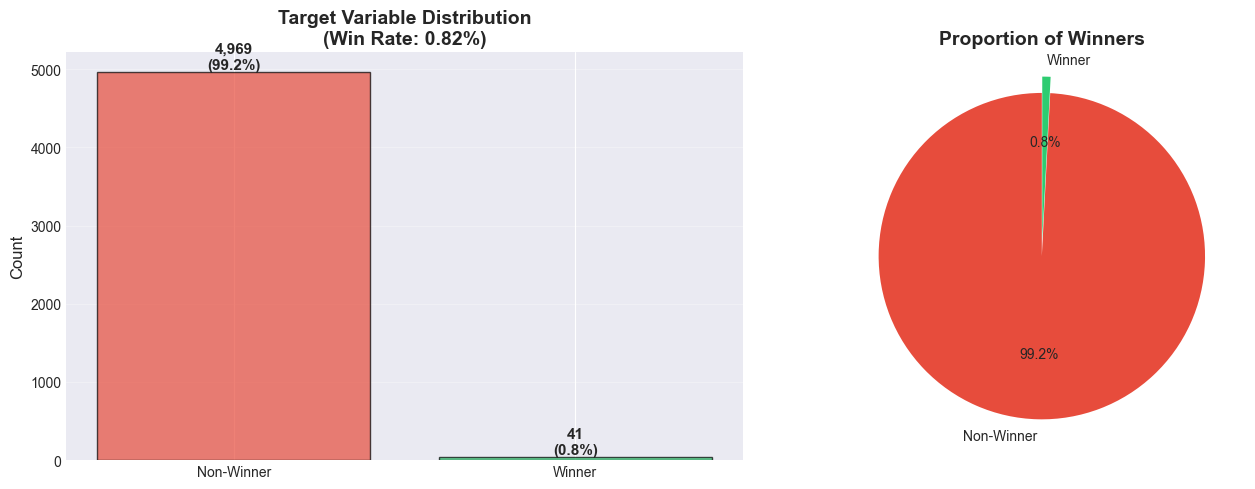

Winners: 41 (0.82%)
Non-Winners: 4,969 (99.18%)
Class Imbalance Ratio: 1:121.2

--- 1.2 Odds/Probability Distributions ---


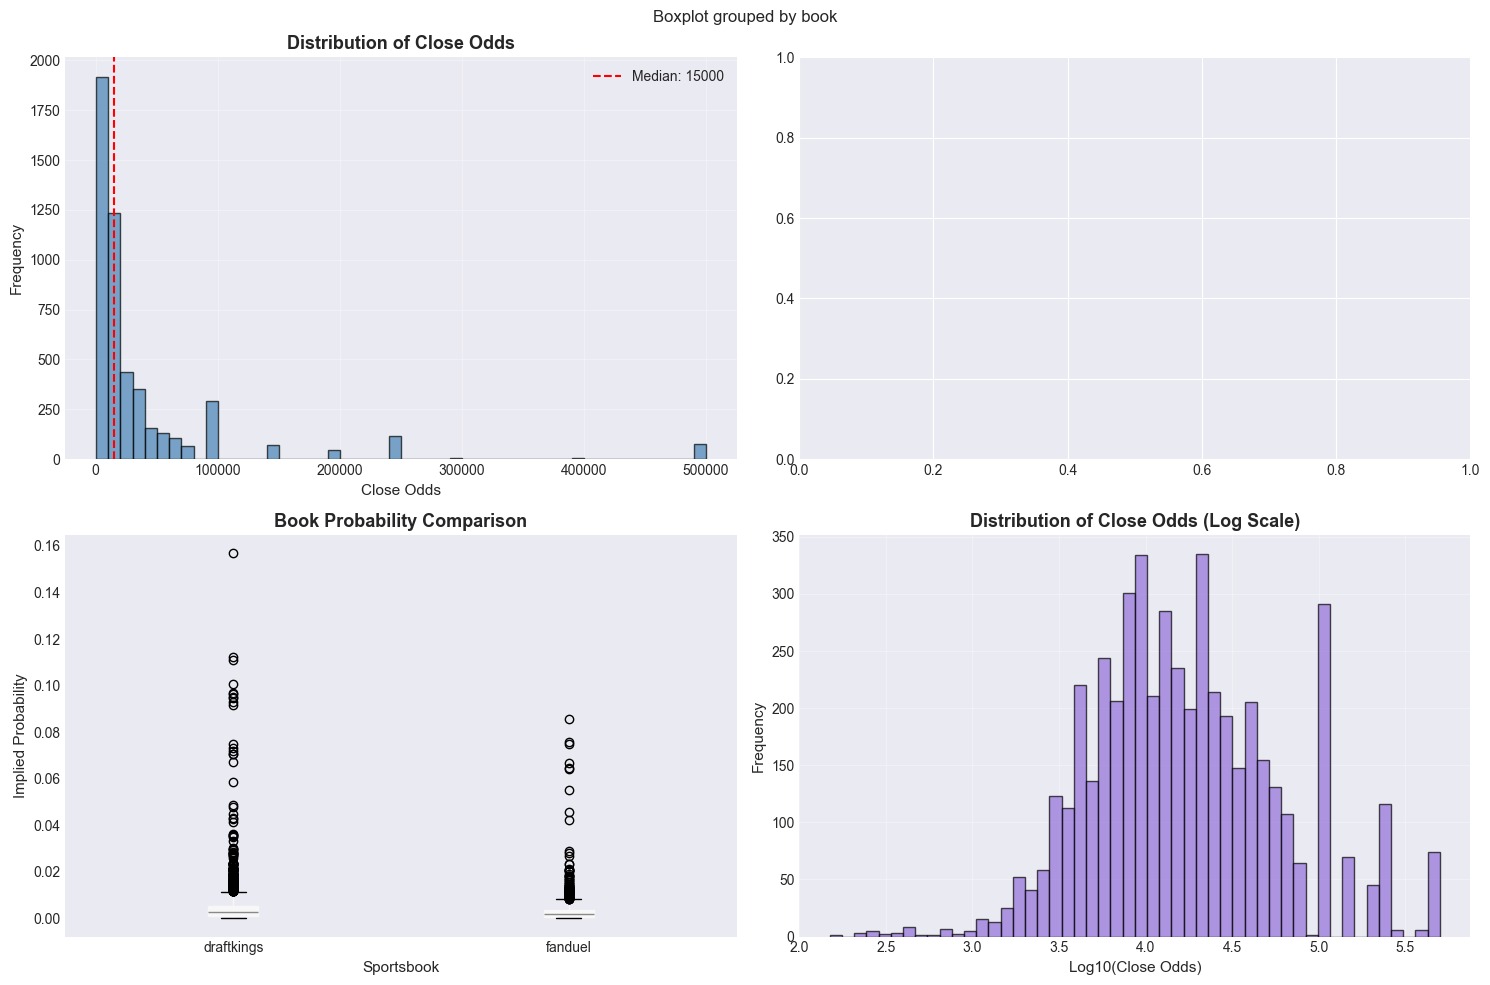


Close Odds Summary Statistics:
count     5010.0000
mean     40274.4581
std      75249.1647
min        150.0000
25%       7000.0000
50%      15000.0000
75%      40000.0000
max     500000.0000
Name: close_odds, dtype: float64

--- 1.3 Tournament Characteristics ---
Field Size Summary:
count   5010.0000
mean     267.9184
std       61.3966
min       60.0000
25%      262.0000
50%      288.0000
75%      310.0000
max      312.0000
Name: field_size, dtype: float64

Overround Summary:
count   5010.0000
mean       2.8435
std        0.0778
min        2.5492
25%        2.7969
50%        2.8377
75%        2.8953
max        3.0740
Name: overround, dtype: float64


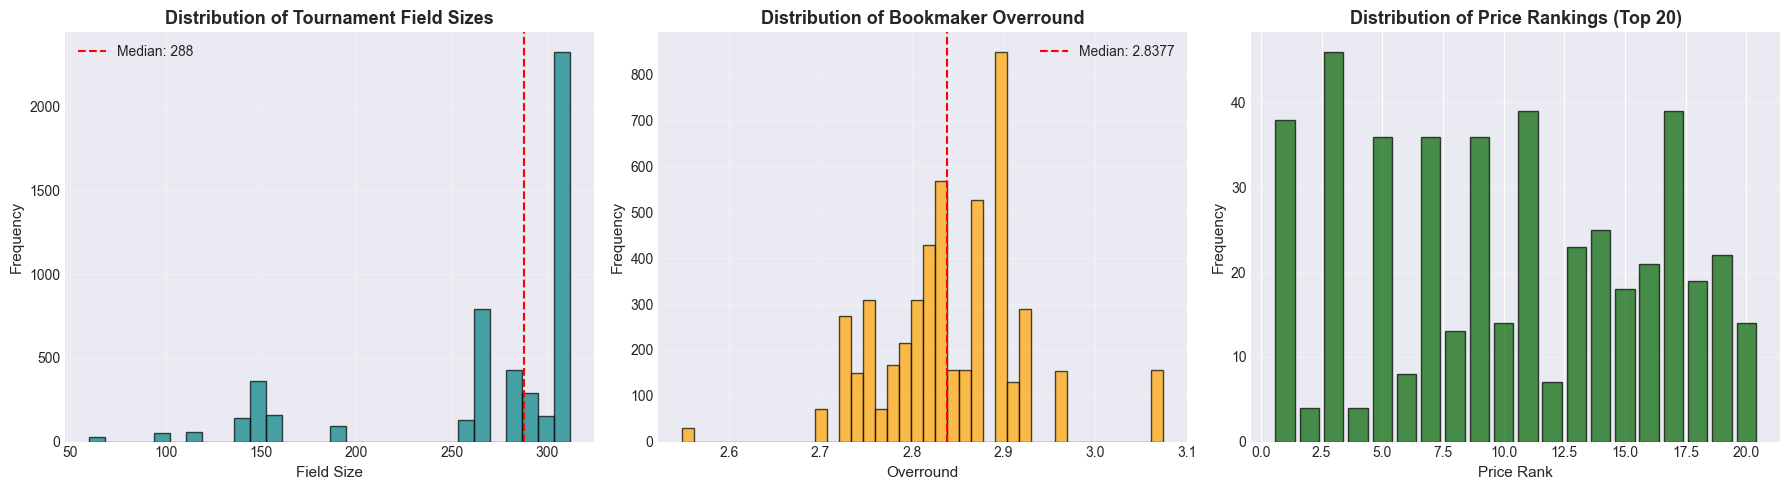


--- 1.4 Temporal Patterns ---
Events by Tour:
tour
pga    41
Name: event_id, dtype: int64


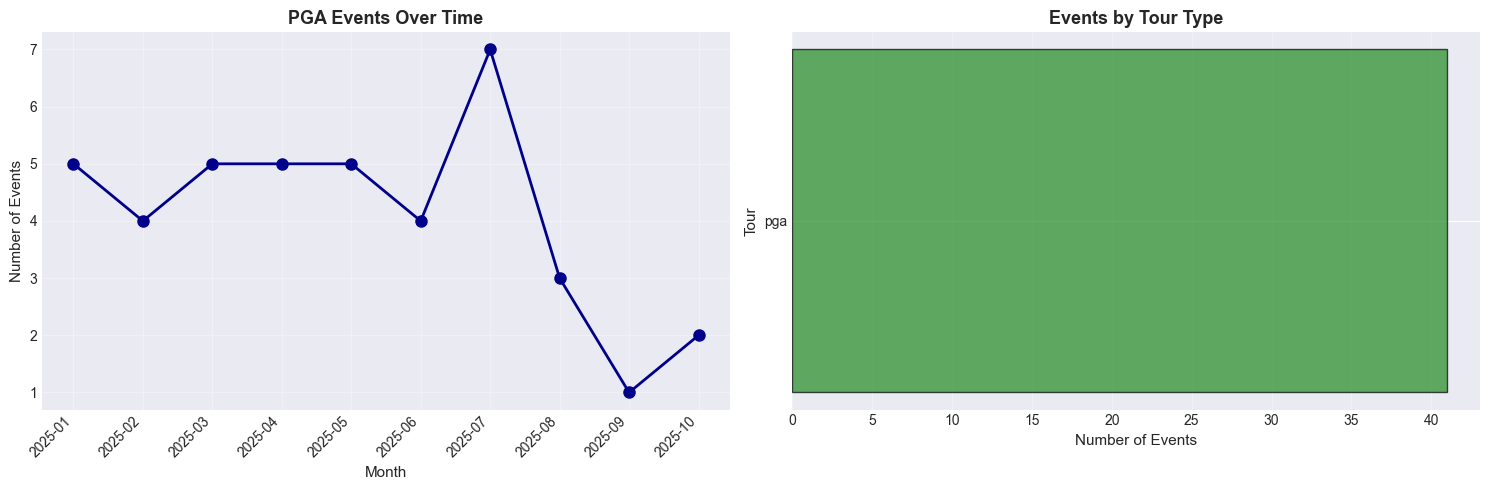

In [10]:
 #============================================================================
# SECTION 1: UNIVARIATE ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("1. UNIVARIATE ANALYSIS")
print("="*70)

# --- 1.1 TARGET VARIABLE ---
print("\n--- 1.1 Target Variable (Y) ---")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
y_counts = df['Y'].value_counts()
win_rate = y_counts[1] / len(df) * 100 if 1 in y_counts.index else 0

axes[0].bar(['Non-Winner', 'Winner'], [y_counts[0], y_counts.get(1, 0)], 
            color=['#e74c3c', '#2ecc71'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title(f'Target Variable Distribution\n(Win Rate: {win_rate:.2f}%)', 
                  fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels
for i, (label, count) in enumerate([(0, y_counts[0]), (1, y_counts.get(1, 0))]):
    axes[0].text(i, count, f'{count:,}\n({count/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie([y_counts[0], y_counts.get(1, 0)], 
            labels=['Non-Winner', 'Winner'],
            autopct='%1.1f%%', startangle=90,
            colors=['#e74c3c', '#2ecc71'], explode=(0, 0.1))
axes[1].set_title('Proportion of Winners', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(figures_dir / '01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Winners: {y_counts.get(1, 0):,} ({win_rate:.2f}%)")
print(f"Non-Winners: {y_counts[0]:,} ({100-win_rate:.2f}%)")
print(f"Class Imbalance Ratio: 1:{y_counts[0]/y_counts.get(1, 1):.1f}")

# --- 1.2 ODDS DISTRIBUTIONS ---
print("\n--- 1.2 Odds/Probability Distributions ---")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Close odds distribution
axes[0, 0].hist(df['close_odds'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df['close_odds'].median(), color='red', linestyle='--', 
                    label=f'Median: {df["close_odds"].median():.0f}')
axes[0, 0].set_xlabel('Close Odds', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Close Odds', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Devigged probability distribution
if 'p_deviggedSportsbookConsensus' in df.columns:
    axes[0, 1].hist(df['p_deviggedSportsbookConsensus'], bins=50, 
                    color='coral', alpha=0.7, edgecolor='black')
    axes[0, 1].axvline(df['p_deviggedSportsbookConsensus'].median(), color='red', 
                       linestyle='--', label=f'Median: {df["p_deviggedSportsbookConsensus"].median():.4f}')
    axes[0, 1].set_xlabel('Devigged Probability', fontsize=11)
    axes[0, 1].set_ylabel('Frequency', fontsize=11)
    axes[0, 1].set_title('Distribution of Devigged Probabilities', fontsize=13, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

# Book probability comparison
if 'p_book' in df.columns and 'book' in df.columns:
    df.boxplot(column='p_book', by='book', ax=axes[1, 0], 
               patch_artist=True, grid=False)
    axes[1, 0].set_xlabel('Sportsbook', fontsize=11)
    axes[1, 0].set_ylabel('Implied Probability', fontsize=11)
    axes[1, 0].set_title('Book Probability Comparison', fontsize=13, fontweight='bold')
    plt.sca(axes[1, 0])
    plt.xticks(rotation=0)

# Log odds for better visualization
axes[1, 1].hist(np.log10(df['close_odds']), bins=50, 
                color='mediumpurple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Log10(Close Odds)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Distribution of Close Odds (Log Scale)', fontsize=13, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / '02_odds_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\nClose Odds Summary Statistics:")
print(df['close_odds'].describe())

if 'p_deviggedSportsbookConsensus' in df.columns:
    print("\nDevigged Probability Summary Statistics:")
    print(df['p_deviggedSportsbookConsensus'].describe())

# --- 1.3 TOURNAMENT CHARACTERISTICS ---
print("\n--- 1.3 Tournament Characteristics ---")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Field size distribution
if 'field_size' in df.columns:
    axes[0].hist(df['field_size'], bins=30, color='teal', alpha=0.7, edgecolor='black')
    axes[0].axvline(df['field_size'].median(), color='red', linestyle='--',
                    label=f'Median: {df["field_size"].median():.0f}')
    axes[0].set_xlabel('Field Size', fontsize=11)
    axes[0].set_ylabel('Frequency', fontsize=11)
    axes[0].set_title('Distribution of Tournament Field Sizes', fontsize=13, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    print("Field Size Summary:")
    print(df['field_size'].describe())

# Overround distribution
if 'overround' in df.columns:
    axes[1].hist(df['overround'], bins=40, color='orange', alpha=0.7, edgecolor='black')
    axes[1].axvline(df['overround'].median(), color='red', linestyle='--',
                    label=f'Median: {df["overround"].median():.4f}')
    axes[1].set_xlabel('Overround', fontsize=11)
    axes[1].set_ylabel('Frequency', fontsize=11)
    axes[1].set_title('Distribution of Bookmaker Overround', fontsize=13, fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    print("\nOverround Summary:")
    print(df['overround'].describe())

# Price rank distribution
if 'price_rank' in df.columns:
    rank_counts = df['price_rank'].value_counts().sort_index().head(20)
    axes[2].bar(rank_counts.index, rank_counts.values, color='darkgreen', alpha=0.7, edgecolor='black')
    axes[2].set_xlabel('Price Rank', fontsize=11)
    axes[2].set_ylabel('Frequency', fontsize=11)
    axes[2].set_title('Distribution of Price Rankings (Top 20)', fontsize=13, fontweight='bold')
    axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / '03_tournament_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

# --- 1.4 TEMPORAL PATTERNS ---
print("\n--- 1.4 Temporal Patterns ---")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Events over time
if 'close_time_dt' in df.columns:
    df['month'] = df['close_time_dt'].dt.to_period('M')
    events_per_month = df.groupby('month')['event_id'].nunique()
    
    axes[0].plot(events_per_month.index.astype(str), events_per_month.values, 
                marker='o', linewidth=2, markersize=8, color='darkblue')
    axes[0].set_xlabel('Month', fontsize=11)
    axes[0].set_ylabel('Number of Events', fontsize=11)
    axes[0].set_title('PGA Events Over Time', fontsize=13, fontweight='bold')
    axes[0].grid(alpha=0.3)
    plt.sca(axes[0])
    plt.xticks(rotation=45, ha='right')

# Tour distribution
if 'tour' in df.columns:
    tour_counts = df.groupby('tour')['event_id'].nunique().sort_values(ascending=False)
    axes[1].barh(tour_counts.index, tour_counts.values, color='forestgreen', alpha=0.7, edgecolor='black')
    axes[1].set_xlabel('Number of Events', fontsize=11)
    axes[1].set_ylabel('Tour', fontsize=11)
    axes[1].set_title('Events by Tour Type', fontsize=13, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    print("Events by Tour:")
    print(tour_counts)

plt.tight_layout()
plt.savefig(figures_dir / '04_temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()


2. BIVARIATE/MULTIVARIATE ANALYSIS

--- 2.1 Relationship to Target (CRITICAL) ---

Mann-Whitney U Test (Winners have lower odds):
  Test statistic: 34923.00
  P-value: 1.8991e-13
  Median odds (Winners): 4400.00
  Median odds (Non-Winners): 15000.00

Win Rate by Price Rank:
           mean  count
rank_bin              
1-5      9.3750    128
6-10     0.9346    107
11-20    2.2026    227
21-50    1.1940    670
50+      0.3868   3878


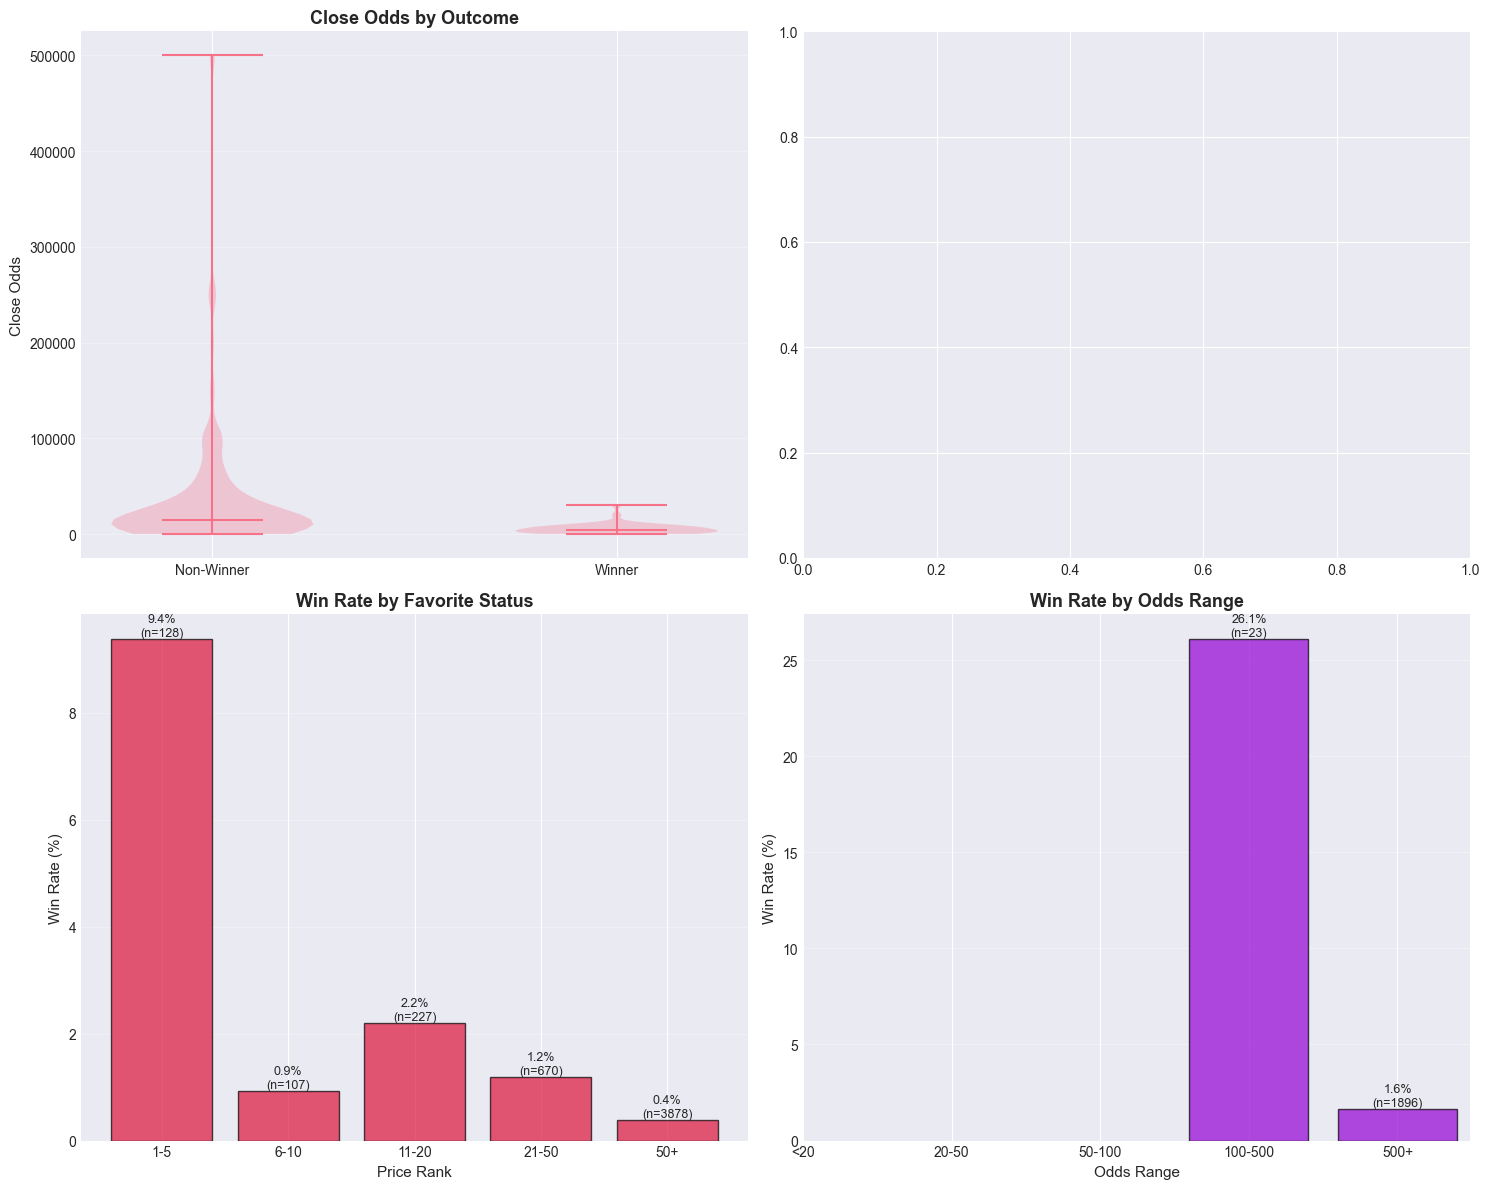


Win Rate by Odds Range:
            mean  count
odds_bin               
<20          NaN      0
20-50        NaN      0
50-100       NaN      0
100-500  26.0870     23
500+      1.6350   1896

--- 2.2 Feature Relationships ---


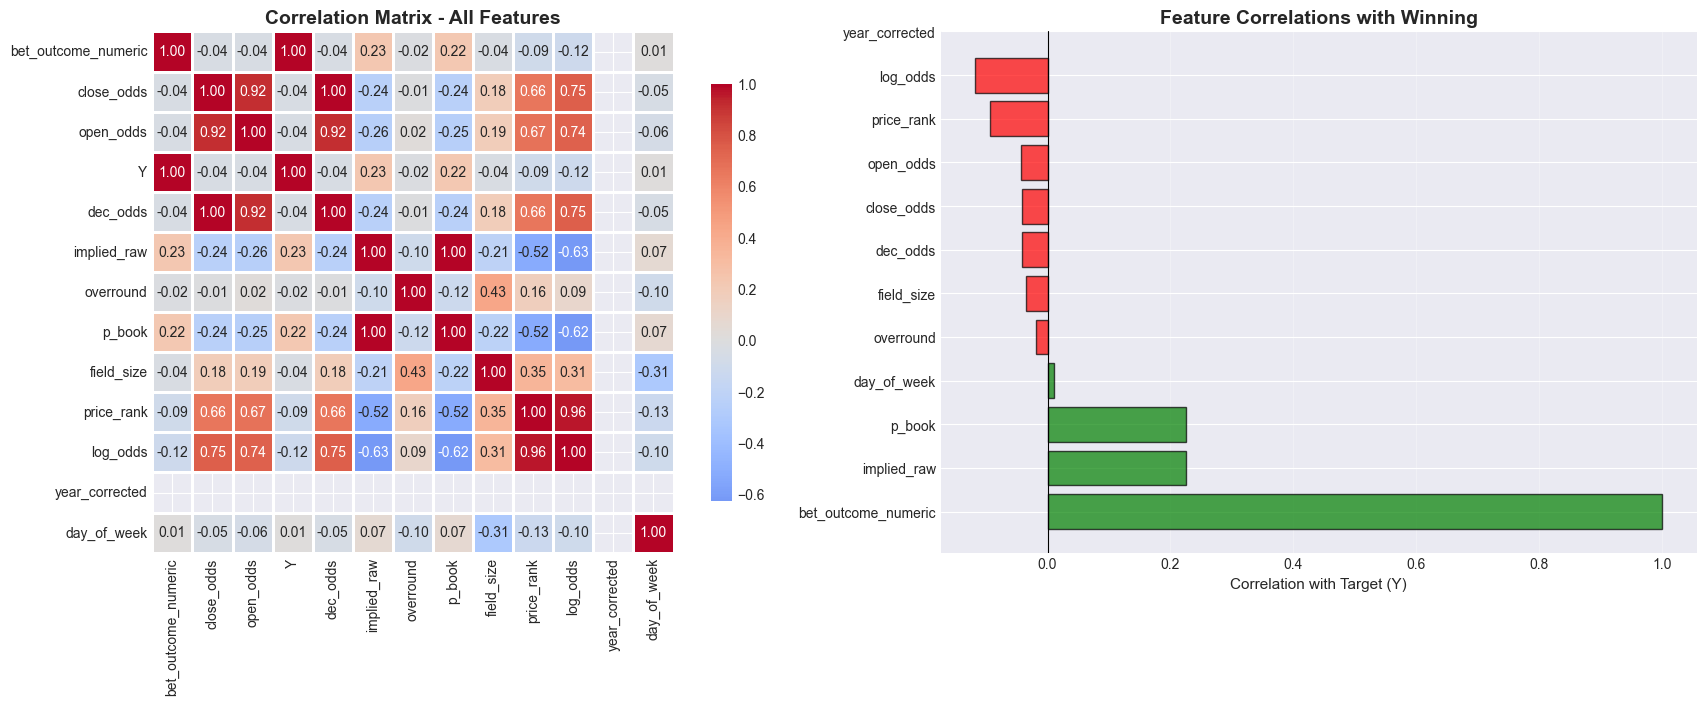


Top Correlations with Target:
bet_outcome_numeric    1.0000
implied_raw            0.2254
p_book                 0.2245
day_of_week            0.0101
overround             -0.0189
field_size            -0.0356
dec_odds              -0.0418
close_odds            -0.0418
open_odds             -0.0439
price_rank            -0.0942
Name: Y, dtype: float64


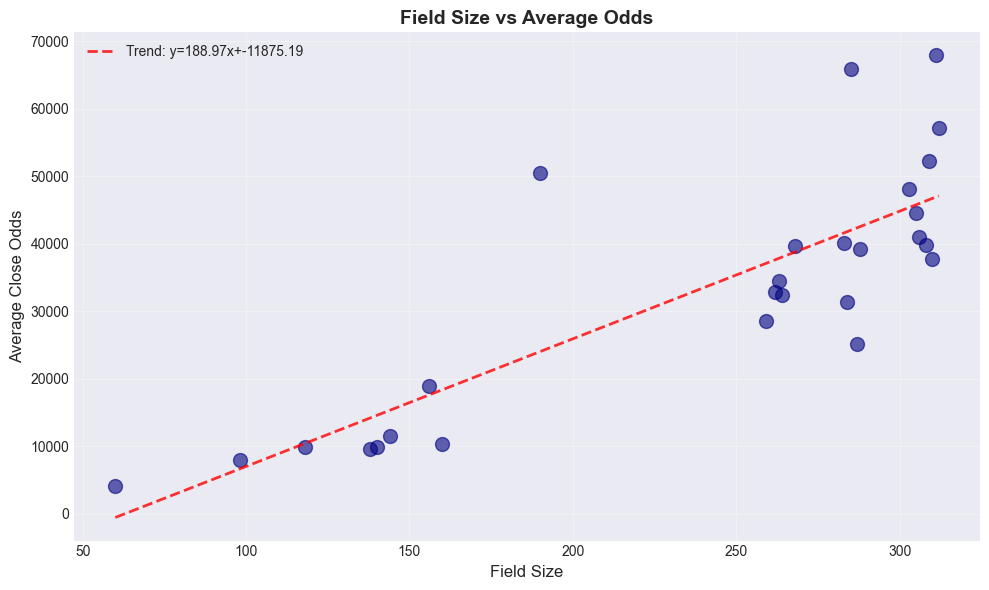


--- 2.3 Subgroup Analysis ---


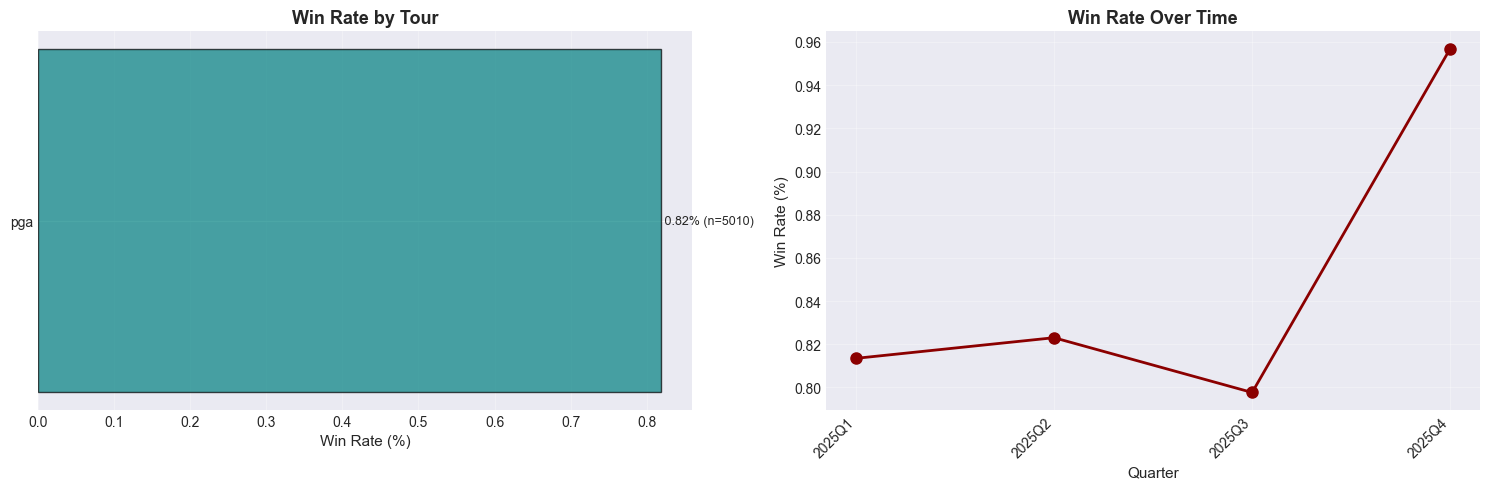

In [14]:
# ============================================================================
# SECTION 2: BIVARIATE/MULTIVARIATE ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("2. BIVARIATE/MULTIVARIATE ANALYSIS")
print("="*70)

# --- 2.1 RELATIONSHIP TO TARGET ---
print("\n--- 2.1 Relationship to Target (CRITICAL) ---")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Odds vs Outcome
axes[0, 0].violinplot([df[df['Y']==0]['close_odds'].dropna(), 
                        df[df['Y']==1]['close_odds'].dropna()],
                       positions=[0, 1], showmedians=True)
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Non-Winner', 'Winner'])
axes[0, 0].set_ylabel('Close Odds', fontsize=11)
axes[0, 0].set_title('Close Odds by Outcome', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Statistical test
winner_odds = df[df['Y']==1]['close_odds'].dropna()
nonwinner_odds = df[df['Y']==0]['close_odds'].dropna()
t_stat, p_val = stats.mannwhitneyu(winner_odds, nonwinner_odds, alternative='less')
print(f"\nMann-Whitney U Test (Winners have lower odds):")
print(f"  Test statistic: {t_stat:.2f}")
print(f"  P-value: {p_val:.4e}")
print(f"  Median odds (Winners): {winner_odds.median():.2f}")
print(f"  Median odds (Non-Winners): {nonwinner_odds.median():.2f}")

# Probability vs Outcome
if 'p_deviggedSportsbookConsensus' in df.columns:
    axes[0, 1].violinplot([df[df['Y']==0]['p_deviggedSportsbookConsensus'].dropna(),
                           df[df['Y']==1]['p_deviggedSportsbookConsensus'].dropna()],
                          positions=[0, 1], showmedians=True)
    axes[0, 1].set_xticks([0, 1])
    axes[0, 1].set_xticklabels(['Non-Winner', 'Winner'])
    axes[0, 1].set_ylabel('Devigged Probability', fontsize=11)
    axes[0, 1].set_title('Probability by Outcome', fontsize=13, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)

# Price rank vs Win Rate
if 'price_rank' in df.columns:
    # Create rank bins
    df['rank_bin'] = pd.cut(df['price_rank'], 
                             bins=[0, 5, 10, 20, 50, 1000],
                             labels=['1-5', '6-10', '11-20', '21-50', '50+'])
    
    win_rate_by_rank = df.groupby('rank_bin')['Y'].agg(['mean', 'count'])
    win_rate_by_rank['mean'] *= 100  # Convert to percentage
    
    axes[1, 0].bar(range(len(win_rate_by_rank)), win_rate_by_rank['mean'],
                   color='crimson', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xticks(range(len(win_rate_by_rank)))
    axes[1, 0].set_xticklabels(win_rate_by_rank.index)
    axes[1, 0].set_xlabel('Price Rank', fontsize=11)
    axes[1, 0].set_ylabel('Win Rate (%)', fontsize=11)
    axes[1, 0].set_title('Win Rate by Favorite Status', fontsize=13, fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Add count labels
    for i, (rate, count) in enumerate(zip(win_rate_by_rank['mean'], win_rate_by_rank['count'])):
        axes[1, 0].text(i, rate, f'{rate:.1f}%\n(n={count})', 
                       ha='center', va='bottom', fontsize=9)
    
    print("\nWin Rate by Price Rank:")
    print(win_rate_by_rank)

# Odds bins vs Win Rate
df['odds_bin'] = pd.cut(df['close_odds'], 
                         bins=[0, 20, 50, 100, 500, 10000],
                         labels=['<20', '20-50', '50-100', '100-500', '500+'])

win_rate_by_odds = df.groupby('odds_bin')['Y'].agg(['mean', 'count'])
win_rate_by_odds['mean'] *= 100

axes[1, 1].bar(range(len(win_rate_by_odds)), win_rate_by_odds['mean'],
               color='darkviolet', alpha=0.7, edgecolor='black')
axes[1, 1].set_xticks(range(len(win_rate_by_odds)))
axes[1, 1].set_xticklabels(win_rate_by_odds.index)
axes[1, 1].set_xlabel('Odds Range', fontsize=11)
axes[1, 1].set_ylabel('Win Rate (%)', fontsize=11)
axes[1, 1].set_title('Win Rate by Odds Range', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (rate, count) in enumerate(zip(win_rate_by_odds['mean'], win_rate_by_odds['count'])):
    axes[1, 1].text(i, rate, f'{rate:.1f}%\n(n={count})', 
                   ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(figures_dir / '05_target_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nWin Rate by Odds Range:")
print(win_rate_by_odds)

# --- 2.2 FEATURE RELATIONSHIPS ---
print("\n--- 2.2 Feature Relationships ---")

# Correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID columns and temporary columns
exclude_cols = ['event_id', 'dg_id', 'month', 'year']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

corr_matrix = df[numeric_cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Full correlation heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[0])
axes[0].set_title('Correlation Matrix - All Features', fontsize=14, fontweight='bold')

# Correlation with target
target_corr = corr_matrix['Y'].sort_values(ascending=False).drop('Y')
colors = ['green' if x > 0 else 'red' for x in target_corr.values]

axes[1].barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(target_corr)))
axes[1].set_yticklabels(target_corr.index)
axes[1].set_xlabel('Correlation with Target (Y)', fontsize=11)
axes[1].set_title('Feature Correlations with Winning', fontsize=14, fontweight='bold')
axes[1].axvline(0, color='black', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / '06_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop Correlations with Target:")
print(target_corr.head(10))

# Field size vs Average Odds
if 'field_size' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    field_odds = df.groupby('field_size')['close_odds'].mean().reset_index()
    
    ax.scatter(field_odds['field_size'], field_odds['close_odds'], 
              alpha=0.6, s=100, color='navy')
    ax.set_xlabel('Field Size', fontsize=12)
    ax.set_ylabel('Average Close Odds', fontsize=12)
    ax.set_title('Field Size vs Average Odds', fontsize=14, fontweight='bold')
    ax.grid(alpha=0.3)
    
    # Add trendline
    z = np.polyfit(field_odds['field_size'], field_odds['close_odds'], 1)
    p = np.poly1d(z)
    ax.plot(field_odds['field_size'], p(field_odds['field_size']), 
           "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
    ax.legend()
    
    plt.tight_layout()
    plt.savefig(figures_dir / '07_field_size_vs_odds.png', dpi=300, bbox_inches='tight')
    plt.show()

# Book consensus (if both books present)
if 'p_book' in df.columns and 'book' in df.columns:
    dk_data = df[df['book'] == 'draftkings'][['dg_id', 'event_id', 'p_book']].rename(columns={'p_book': 'p_dk'})
    fd_data = df[df['book'] == 'fanduel'][['dg_id', 'event_id', 'p_book']].rename(columns={'p_book': 'p_fd'})
    
    book_compare = pd.merge(dk_data, fd_data, on=['dg_id', 'event_id'], how='inner')
    
    if len(book_compare) > 0:
        fig, ax = plt.subplots(figsize=(10, 10))
        
        ax.scatter(book_compare['p_dk'], book_compare['p_fd'], 
                  alpha=0.3, s=20, color='purple')
        ax.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect Agreement')
        ax.set_xlabel('DraftKings Probability', fontsize=12)
        ax.set_ylabel('FanDuel Probability', fontsize=12)
        ax.set_title('Book Consensus Analysis', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(alpha=0.3)
        ax.set_xlim([0, book_compare['p_dk'].max()*1.1])
        ax.set_ylim([0, book_compare['p_fd'].max()*1.1])
        
        correlation = book_compare[['p_dk', 'p_fd']].corr().iloc[0, 1]
        ax.text(0.05, 0.95, f'Correlation: {correlation:.4f}', 
               transform=ax.transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        plt.savefig(figures_dir / '08_book_consensus.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\nBook Correlation: {correlation:.4f}")

# --- 2.3 SUBGROUP ANALYSIS ---
print("\n--- 2.3 Subgroup Analysis ---")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Win rate by tour
if 'tour' in df.columns:
    tour_stats = df.groupby('tour')['Y'].agg(['mean', 'count'])
    tour_stats['mean'] *= 100
    tour_stats = tour_stats.sort_values('mean', ascending=False)
    
    axes[0].barh(range(len(tour_stats)), tour_stats['mean'], 
                color='teal', alpha=0.7, edgecolor='black')
    axes[0].set_yticks(range(len(tour_stats)))
    axes[0].set_yticklabels(tour_stats.index)
    axes[0].set_xlabel('Win Rate (%)', fontsize=11)
    axes[0].set_title('Win Rate by Tour', fontsize=13, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    for i, (rate, count) in enumerate(zip(tour_stats['mean'], tour_stats['count'])):
        axes[0].text(rate, i, f' {rate:.2f}% (n={count})', 
                    va='center', fontsize=9)

# Win rate over time
if 'close_time_dt' in df.columns:
    df['quarter'] = df['close_time_dt'].dt.to_period('Q')
    time_stats = df.groupby('quarter')['Y'].agg(['mean', 'count'])
    time_stats['mean'] *= 100
    
    axes[1].plot(time_stats.index.astype(str), time_stats['mean'], 
                marker='o', linewidth=2, markersize=8, color='darkred')
    axes[1].set_xlabel('Quarter', fontsize=11)
    axes[1].set_ylabel('Win Rate (%)', fontsize=11)
    axes[1].set_title('Win Rate Over Time', fontsize=13, fontweight='bold')
    axes[1].grid(alpha=0.3)
    plt.sca(axes[1])
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig(figures_dir / '09_subgroup_analysis.png', dpi=300, bbox_inches='tight')
plt.show()




3. SURPRISING FINDINGS

--- Identifying Outliers and Anomalies ---

Players with Multiple Wins:
player_name
Scheffler, Scottie    6
McIlroy, Rory         3
Campbell, Brian       2
Fox, Ryan             2
Straka, Sepp          2
dtype: int64


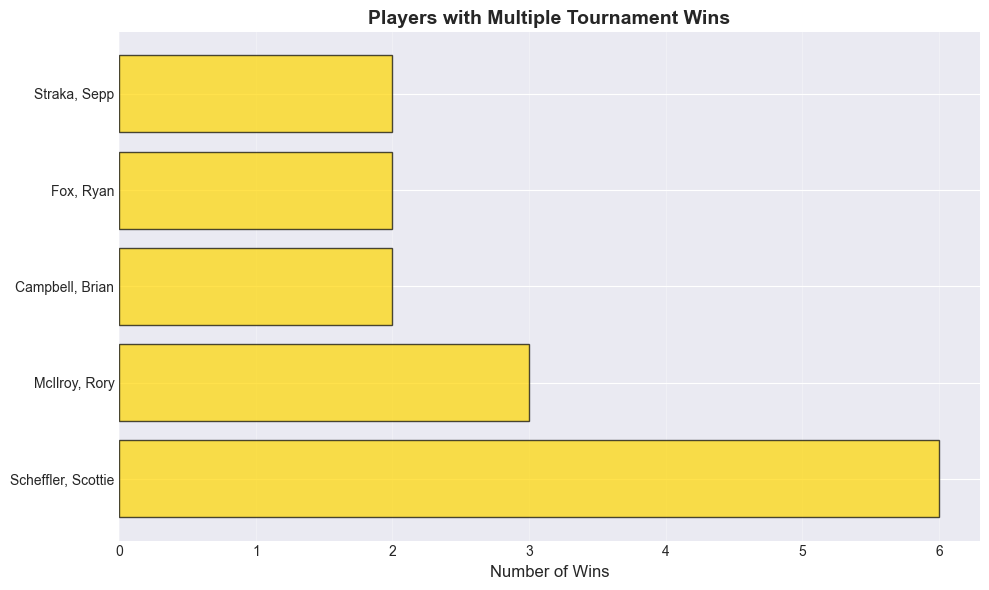


Top 10 Longshot Winners (Highest Odds):
             player_name                             event_name  close_odds
2331     Campbell, Brian                     John Deere Classic       30000
4642     Campbell, Brian            Mexico Open at VidantaWorld       20000
2046         Spaun, J.J.                              U.S. Open       12000
941       Highsmith, Joe  Cognizant Classic in The Palm Beaches       11000
545         Taylor, Nick                    Sony Open in Hawaii       10000
2146        Rose, Justin            FedEx St. Jude Championship        9000
4338  Potgieter, Aldrich                         Rocket Classic        9000
4867     Gotterup, Chris                  Genesis Scottish Open        9000
190        Detry, Thomas                        WM Phoenix Open        8000
320      English, Harris                 Farmers Insurance Open        8000

Lowest Overround (Most Efficient Market): 2.5492 - TOUR Championship
Highest Overround (Least Efficient Market): 3.0740 - 

In [17]:
# ============================================================================
# SECTION 3: SURPRISING FINDINGS
# ============================================================================

print("\n" + "="*70)
print("3. SURPRISING FINDINGS")
print("="*70)

# Calibration analysis: Expected vs Actual win rates
if 'p_deviggedSportsbookConsensus' in df.columns:
    df['prob_bin'] = pd.cut(df['p_deviggedSportsbookConsensus'], 
                             bins=[0, 0.01, 0.02, 0.05, 0.10, 0.20, 1.0],
                             labels=['<1%', '1-2%', '2-5%', '5-10%', '10-20%', '>20%'])
    
    calibration = df.groupby('prob_bin').agg({
        'Y': ['mean', 'count'],
        'p_deviggedSportsbookConsensus': 'mean'
    })
    
    calibration.columns = ['actual_win_rate', 'count', 'expected_win_rate']
    calibration['actual_win_rate'] *= 100
    calibration['expected_win_rate'] *= 100
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    x = range(len(calibration))
    width = 0.35
    
    ax.bar([i - width/2 for i in x], calibration['expected_win_rate'], 
          width, label='Expected (Bookmaker)', color='orange', alpha=0.7, edgecolor='black')
    ax.bar([i + width/2 for i in x], calibration['actual_win_rate'], 
          width, label='Actual (Observed)', color='blue', alpha=0.7, edgecolor='black')
    
    ax.set_xlabel('Probability Range', fontsize=12)
    ax.set_ylabel('Win Rate (%)', fontsize=12)
    ax.set_title('Probability Calibration: Expected vs Actual Win Rates', 
                fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(calibration.index)
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    
    # Add sample sizes
    for i, count in enumerate(calibration['count']):
        ax.text(i, -2, f'n={count}', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(figures_dir / '10_calibration_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nCalibration Analysis:")
    print(calibration)
    
    # Calculate overall calibration error
    total_bets = calibration['count'].sum()
    calibration['weighted_error'] = (abs(calibration['expected_win_rate'] - 
                                         calibration['actual_win_rate']) * 
                                     calibration['count'] / total_bets)
    mean_abs_error = calibration['weighted_error'].sum()
    print(f"\nWeighted Mean Absolute Calibration Error: {mean_abs_error:.2f}%")

# Identify anomalous events or players
print("\n--- Identifying Outliers and Anomalies ---")

# Find players with multiple wins
if 'player_name' in df.columns:
    multiple_winners = df[df['Y']==1].groupby('player_name').size()
    multiple_winners = multiple_winners[multiple_winners > 1].sort_values(ascending=False)
    
    if len(multiple_winners) > 0:
        print("\nPlayers with Multiple Wins:")
        print(multiple_winners)
        
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.barh(range(len(multiple_winners)), multiple_winners.values, color='gold', alpha=0.7, edgecolor='black')
        ax.set_yticks(range(len(multiple_winners)))
        ax.set_yticklabels(multiple_winners.index)
        ax.set_xlabel('Number of Wins', fontsize=12)
        ax.set_title('Players with Multiple Tournament Wins', fontsize=14, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(figures_dir / '11_multiple_winners.png', dpi=300, bbox_inches='tight')
        plt.show()

# Find extreme odds winners (longshots that won)
if len(df[df['Y']==1]) > 0:
    cols_to_show = ['player_name', 'event_name', 'close_odds']
    if 'p_deviggedSportsbookConsensus' in df.columns:
        cols_to_show.append('p_deviggedSportsbookConsensus')
    elif 'p_devigged' in df.columns:
        cols_to_show.append('p_devigged')
    
    top_longshots = df[df['Y']==1].nlargest(10, 'close_odds')[cols_to_show]
    print("\nTop 10 Longshot Winners (Highest Odds):")
    print(top_longshots.to_string())

# Overround outliers
if 'overround' in df.columns and 'event_name' in df.columns:
    event_overround = df.groupby('event_name')['overround'].first().sort_values()
    
    print(f"\nLowest Overround (Most Efficient Market): {event_overround.iloc[0]:.4f} - {event_overround.index[0]}")
    print(f"Highest Overround (Least Efficient Market): {event_overround.iloc[-1]:.4f} - {event_overround.index[-1]}")



4. DATA LIMITATIONS

--- Missing Data Check ---

Columns with Missing Values:
  odds_bin: 3,091 (61.70%)


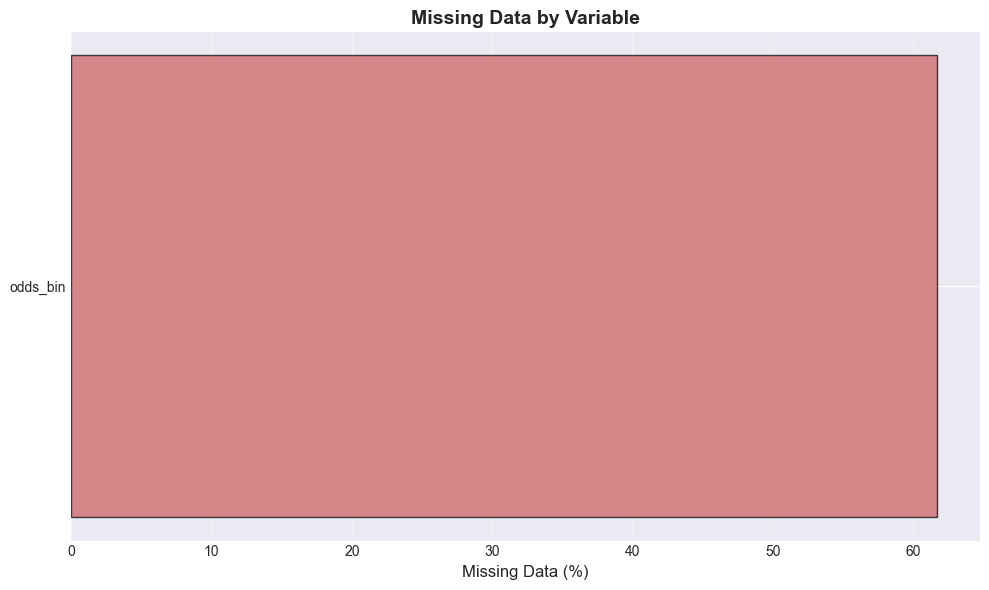


--- Sample Size Analysis ---

Observations by Tour:
tour
pga    5010
Name: count, dtype: int64

Observations by Quarter:
quarter
2025Q1    1721
2025Q2    1701
2025Q3    1379
2025Q4     209
Freq: Q-DEC, Name: count, dtype: int64


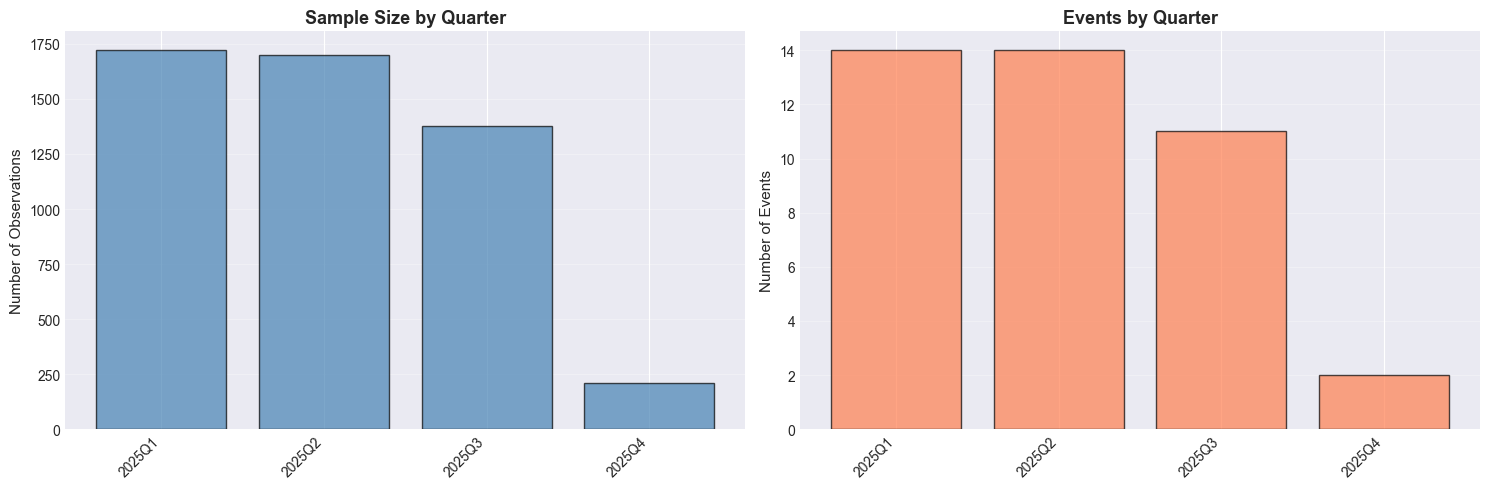


Total Unique Players: 682
Players appearing once: 293
Players appearing 5+ times: 235
Players appearing 10+ times: 197


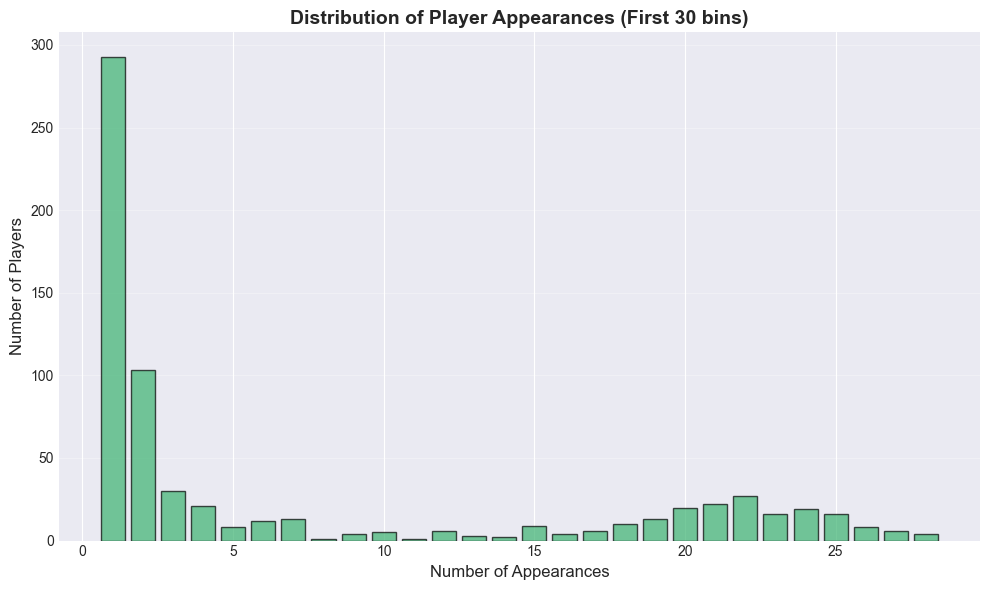


Events with field size < 50: 0 (0.0%)

SUMMARY STATISTICS FOR REPORT

Key Variable Summary Statistics:
  Variable       Mean     Median    Std Dev      Min         Max  Missing (%)
close_odds 40274.4581 15000.0000 75249.1647 150.0000 500000.0000       0.0000
    p_book     0.0042     0.0023     0.0073   0.0001      0.1569       0.0000
 overround     2.8435     2.8377     0.0778   2.5492      3.0740       0.0000
field_size   267.9184   288.0000    61.3966  60.0000    312.0000       0.0000
price_rank   127.2467   116.0000    84.1353   1.0000    312.0000       0.0000

✓ Summary statistics saved to: figures/summary_statistics.csv

EDA COMPLETE - FIGURES GENERATED

Total figures created: 12

Generated figures:
  1. 01_target_distribution.png
  2. 02_odds_distributions.png
  3. 03_tournament_characteristics.png
  4. 04_temporal_patterns.png
  5. 05_target_relationships.png
  6. 06_correlation_analysis.png
  7. 07_field_size_vs_odds.png
  8. 09_subgroup_analysis.png
  9. 11_multiple_winners.

In [18]:
# ============================================================================
# SECTION 4: DATA LIMITATIONS
# ============================================================================

print("\n" + "="*70)
print("4. DATA LIMITATIONS")
print("="*70)

# Check for missing values in cleaned data
print("\n--- Missing Data Check ---")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    print("\nColumns with Missing Values:")
    for col, count in missing_data.items():
        pct = (count / len(df)) * 100
        print(f"  {col}: {count:,} ({pct:.2f}%)")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_pct = (missing_data / len(df)) * 100
    ax.barh(range(len(missing_pct)), missing_pct.values, color='indianred', alpha=0.7, edgecolor='black')
    ax.set_yticks(range(len(missing_pct)))
    ax.set_yticklabels(missing_pct.index)
    ax.set_xlabel('Missing Data (%)', fontsize=12)
    ax.set_title('Missing Data by Variable', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(figures_dir / '12_missing_data.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n✓ No missing data in cleaned dataset")

# Sample size by category
print("\n--- Sample Size Analysis ---")

# By tour
if 'tour' in df.columns:
    print("\nObservations by Tour:")
    tour_sizes = df['tour'].value_counts()
    print(tour_sizes)

# By time period
if 'close_time_dt' in df.columns:
    print("\nObservations by Quarter:")
    quarter_sizes = df['quarter'].value_counts().sort_index()
    print(quarter_sizes)
    
    # Visualize temporal coverage
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Observations per quarter
    axes[0].bar(range(len(quarter_sizes)), quarter_sizes.values, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].set_xticks(range(len(quarter_sizes)))
    axes[0].set_xticklabels(quarter_sizes.index.astype(str), rotation=45, ha='right')
    axes[0].set_ylabel('Number of Observations', fontsize=11)
    axes[0].set_title('Sample Size by Quarter', fontsize=13, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Events per quarter
    events_per_quarter = df.groupby('quarter')['event_id'].nunique()
    axes[1].bar(range(len(events_per_quarter)), events_per_quarter.values, color='coral', alpha=0.7, edgecolor='black')
    axes[1].set_xticks(range(len(events_per_quarter)))
    axes[1].set_xticklabels(events_per_quarter.index.astype(str), rotation=45, ha='right')
    axes[1].set_ylabel('Number of Events', fontsize=11)
    axes[1].set_title('Events by Quarter', fontsize=13, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(figures_dir / '13_temporal_coverage.png', dpi=300, bbox_inches='tight')
    plt.show()

# Player representation
if 'player_name' in df.columns:
    player_counts = df['player_name'].value_counts()
    print(f"\nTotal Unique Players: {len(player_counts):,}")
    print(f"Players appearing once: {(player_counts == 1).sum():,}")
    print(f"Players appearing 5+ times: {(player_counts >= 5).sum():,}")
    print(f"Players appearing 10+ times: {(player_counts >= 10).sum():,}")
    
    # Distribution of player appearances
    fig, ax = plt.subplots(figsize=(10, 6))
    appearance_dist = player_counts.value_counts().sort_index()
    ax.bar(appearance_dist.index[:30], appearance_dist.values[:30], color='mediumseagreen', alpha=0.7, edgecolor='black')
    ax.set_xlabel('Number of Appearances', fontsize=12)
    ax.set_ylabel('Number of Players', fontsize=12)
    ax.set_title('Distribution of Player Appearances (First 30 bins)', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(figures_dir / '14_player_representation.png', dpi=300, bbox_inches='tight')
    plt.show()

# Field size adequacy
if 'field_size' in df.columns:
    small_field_threshold = 50
    small_fields = df[df['field_size'] < small_field_threshold]
    print(f"\nEvents with field size < {small_field_threshold}: {small_fields['event_id'].nunique()} ({small_fields['event_id'].nunique() / df['event_id'].nunique() * 100:.1f}%)")

# ============================================================================
# SUMMARY STATISTICS TABLE
# ============================================================================

print("\n" + "="*70)
print("SUMMARY STATISTICS FOR REPORT")
print("="*70)

# Create comprehensive summary table
summary_stats = pd.DataFrame({
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Std Dev': [],
    'Min': [],
    'Max': [],
    'Missing (%)': []
})

# Check for different column name variations
prob_col = None
if 'p_deviggedSportsbookConsensus' in df.columns:
    prob_col = 'p_deviggedSportsbookConsensus'
elif 'p_devigged' in df.columns:
    prob_col = 'p_devigged'

key_vars = ['close_odds', prob_col, 'p_book', 'overround', 'field_size', 'price_rank']
key_vars = [v for v in key_vars if v is not None and v in df.columns]

for var in key_vars:
    summary_stats = pd.concat([summary_stats, pd.DataFrame({
        'Variable': [var],
        'Mean': [df[var].mean()],
        'Median': [df[var].median()],
        'Std Dev': [df[var].std()],
        'Min': [df[var].min()],
        'Max': [df[var].max()],
        'Missing (%)': [(df[var].isnull().sum() / len(df)) * 100]
    })], ignore_index=True)

print("\nKey Variable Summary Statistics:")
print(summary_stats.to_string(index=False))

# Save summary stats to CSV
summary_stats.to_csv('figures/summary_statistics.csv', index=False)
print("\n✓ Summary statistics saved to: figures/summary_statistics.csv")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("EDA COMPLETE - FIGURES GENERATED")
print("="*70)

print(f"\nTotal figures created: {len(list(figures_dir.glob('*.png')))}")
print("\nGenerated figures:")
for i, fig_path in enumerate(sorted(figures_dir.glob('*.png')), 1):
    print(f"  {i}. {fig_path.name}")

print("\n" + "="*70)
print("KEY INSIGHTS FOR SPRINT 2 REPORT")
print("="*70)

# Calculate key metrics
if 'Y' in df.columns:
    win_rate = df['Y'].mean() * 100
    print(f"\n1. Class Imbalance: {win_rate:.2f}% win rate (severe imbalance)")

if 'close_odds' in df.columns and 'Y' in df.columns:
    winner_median_odds = df[df['Y']==1]['close_odds'].median()
    nonwinner_median_odds = df[df['Y']==0]['close_odds'].median()
    print(f"\n2. Odds Signal: Winners have median odds of {winner_median_odds:.1f} vs {nonwinner_median_odds:.1f} for non-winners")

if 'price_rank' in df.columns and 'Y' in df.columns:
    top5_winrate = df[df['price_rank'] <= 5]['Y'].mean() * 100
    print(f"\n3. Favorite Performance: Top 5 favorites win {top5_winrate:.1f}% of tournaments")

# Check for probability column
prob_col = 'p_deviggedSportsbookConsensus' if 'p_deviggedSportsbookConsensus' in df.columns else 'p_devigged' if 'p_devigged' in df.columns else None
if prob_col and 'Y' in df.columns:
    winner_prob = df[df['Y']==1][prob_col].mean() * 100
    print(f"\n4. Average Winner Probability: {winner_prob:.2f}% (according to devigged odds)")

if 'overround' in df.columns:
    avg_overround = df.groupby('event_id')['overround'].first().mean()
    print(f"\n5. Market Efficiency: Average overround of {avg_overround:.4f} ({(avg_overround-1)*100:.2f}% margin)")

print("\n" + "="*70)
print("✓ EDA ANALYSIS COMPLETE")
print("="*70)
print("\nNext Steps:")
print("  1. Review all figures in the 'figures/' directory")
print("  2. Select 4-6 best visualizations for Sprint 2 report")
print("  3. Write narrative interpretations for each chosen figure")
print("  4. Document surprising findings and data limitations")
print("  5. Update analytical approach based on EDA insights")
print("="*70)